In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [100]:
dataset = pd.read_csv('C:/Users/nooru/Desktop/Elevvo internship/Student Score Prediction/dataset/StudentPerformanceFactors.csv')

In [101]:
dataset.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [102]:
dataset.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [103]:
dataset['Parental_Education_Level'].fillna(dataset['Parental_Education_Level'].mode()[0], inplace=True)
dataset['Distance_from_Home'].fillna(dataset['Distance_from_Home'].mode()[0], inplace=True)
dataset['Teacher_Quality'].fillna(dataset['Teacher_Quality'].mode()[0], inplace=True)

C:\Users\nooru\AppData\Local\Temp\ipykernel_23988\669687769.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Parental_Education_Level'].fillna(dataset['Parental_Education_Level'].mode()[0], inplace=True)
C:\Users\nooru\AppData\Local\Temp\ipykernel_23988\669687769.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

In [104]:
dataset.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [105]:
dataset.duplicated().sum()

0

In [106]:
X = dataset[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours', 'Tutoring_Sessions']]
y = dataset['Exam_Score']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [108]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [109]:
y_pred = model.predict(X_test)

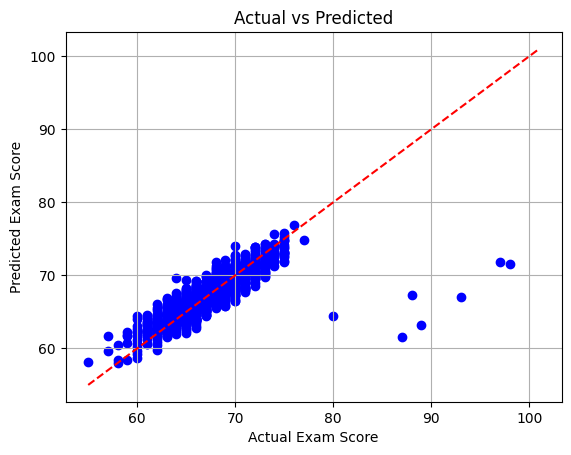

In [110]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


In [111]:
print('MAE: - training.ipynb:1', mean_absolute_error(y_test, y_pred))
print('MSE: - training.ipynb:2', mean_squared_error(y_test, y_pred))
print('R2 Score: - training.ipynb:3', r2_score(y_test, y_pred))

MAE: - training.ipynb:1 1.2750675674601806
MSE: - training.ipynb:2 5.077071891225927
R2 Score: - training.ipynb:3 0.640817413500792


In [112]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_train_poly_scaled = StandardScaler().fit_transform(X_train_poly)
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = StandardScaler().fit_transform(X_test_poly)

In [113]:
model.fit(X_train_poly_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [114]:
y_pred_poly = model.predict(X_test_poly_scaled)

In [115]:
print('MAE: - training.ipynb:1', mean_absolute_error(y_test, y_pred_poly))
print('MSE: - training.ipynb:2', mean_squared_error(y_test, y_pred_poly))
print('R2 Score: - training.ipynb:3', r2_score(y_test, y_pred_poly))

MAE: - training.ipynb:1 1.2771961723187137
MSE: - training.ipynb:2 5.1123289410103245
R2 Score: - training.ipynb:3 0.6383231178506209
